import oracledb
import pandas as pd
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

# Database connection
dsn = oracledb.makedsn("127.0.0.1", 1521, service_name="XE")
connection = oracledb.connect(user="system", password=os.environ.get("ORACLE_PASSWORD"), dsn=dsn)
cursor = connection.cursor()

# Query average rating per bank
query_avg = """
SELECT b.bank_name, AVG(r.rating) as avg_rating, COUNT(*) as review_count
FROM banks b
JOIN reviews r ON b.bank_id = r.bank_id
GROUP BY b.bank_name
"""
avg_df = pd.read_sql(query_avg, connection)

# Query rating distribution per bank
query_dist = """
SELECT b.bank_name, r.rating, COUNT(*) as count
FROM banks b
JOIN reviews r ON b.bank_id = r.bank_id
GROUP BY b.bank_name, r.rating
ORDER BY b.bank_name, r.rating
"""
dist_df = pd.read_sql(query_dist, connection)

# Close connection
cursor.close()
connection.close()

print("Average Ratings:\n", avg_df)
print("\nRating Distribution:\n", dist_df)

Bar Chart of Average Ratings per Bank:

C:\Users\abdel\AppData\Local\Temp\ipykernel_10580\2936795117.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="BANK_NAME", y="AVG_RATING", data=avg_df, palette="viridis")


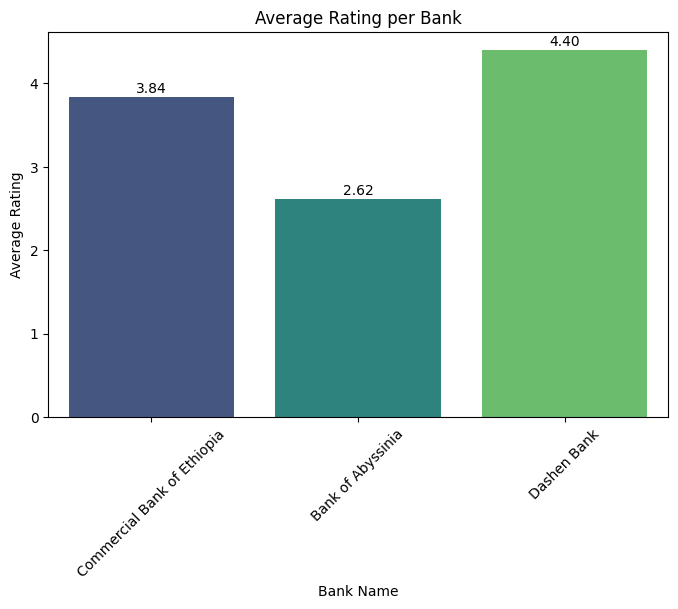

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x="BANK_NAME", y="AVG_RATING", data=avg_df, palette="viridis")
plt.title("Average Rating per Bank")
plt.xlabel("Bank Name")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
for i, v in enumerate(avg_df["AVG_RATING"]):
    plt.text(i, v + 0.05, f"{v:.2f}", ha="center")
plt.show()

Stacked Bar Chart of Rating Distribution per Bank:

<Figure size 1000x600 with 0 Axes>

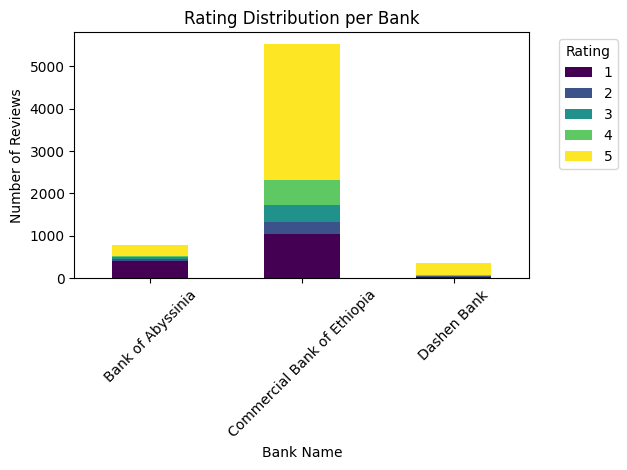

In [5]:
plt.figure(figsize=(10, 6))
pivot_df = dist_df.pivot(index="BANK_NAME", columns="RATING", values="COUNT").fillna(0)
pivot_df.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Rating Distribution per Bank")
plt.xlabel("Bank Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Final Insight:

In [6]:
insights = """
**Insights:**
- **Commercial Bank of Ethiopia (CBE, 3.84):**
  - Drivers: UI/speed (3,207 5-star reviews).
  - Pain Points: Slow transfers/bugs (1,038 1-star, 278 2-star).
- **Bank of Abyssinia (BOA, 2.62):**
  - Drivers: Niche strengths (255 5-star).
  - Pain Points: Crashes/login errors (398 1-star).
- **Dashen Bank (4.40):**
  - Drivers: Reliability (285 5-star, 4.40 avg).
  - Pain Points: Feature gaps (31 1-star).
"""
print(insights)


**Insights:**
- **Commercial Bank of Ethiopia (CBE, 3.84):**
  - Drivers: UI/speed (3,207 5-star reviews).
  - Pain Points: Slow transfers/bugs (1,038 1-star, 278 2-star).
- **Bank of Abyssinia (BOA, 2.62):**
  - Drivers: Niche strengths (255 5-star).
  - Pain Points: Crashes/login errors (398 1-star).
- **Dashen Bank (4.40):**
  - Drivers: Reliability (285 5-star, 4.40 avg).
  - Pain Points: Feature gaps (31 1-star).



Recommendation:

In [7]:
recommendations = """
**Recommendations:**
- **CBE**: Optimize transfer speed, add budgeting tool.
- **BOA**: Fix crashes/login errors, enhance UI.
- **Dashen**: Add fingerprint login, improve minor features.
"""
print(recommendations)


**Recommendations:**
- **CBE**: Optimize transfer speed, add budgeting tool.
- **BOA**: Fix crashes/login errors, enhance UI.
- **Dashen**: Add fingerprint login, improve minor features.



Ethics:

In [8]:
ethics = "Potential bias: High 1-star counts (e.g., CBE 1,038, BOA 398) suggest negative skew from complaint-focused reviews."
print(ethics)

Potential bias: High 1-star counts (e.g., CBE 1,038, BOA 398) suggest negative skew from complaint-focused reviews.
